## Plots

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [2]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [3]:
df = pd.read_csv('dados tratados/v1/data.csv')

In [4]:
for column in df.columns[1:-1]:
    df[column] = df[column]/df[column].abs().max()

### Plot da importância das features - Classificação

In [5]:
X = df.iloc[:,1:12]
y = df.iloc[:,-1]

In [6]:
features = list(X.columns)

In [7]:
model = RandomForestClassifier()

model.fit(X, y)

feature_importance_c = model.feature_importances_

for i, importance in enumerate(feature_importance_c):
    print(f'Feature {i+1}: {importance}')

Feature 1: 0.041495322997461705
Feature 2: 0.02286084661361152
Feature 3: 0.0
Feature 4: 0.03404648672413626
Feature 5: 0.0
Feature 6: 0.0767477024040995
Feature 7: 0.027245325095895154
Feature 8: 0.40705079342344513
Feature 9: 0.21904956275373416
Feature 10: 0.035836544745782704
Feature 11: 0.1356674152418338


In [8]:
# index = np.argsort(feature_importance_c)
# feature_importance_c = np.array(feature_importance_c)[index]
# features = np.array(features)[index]

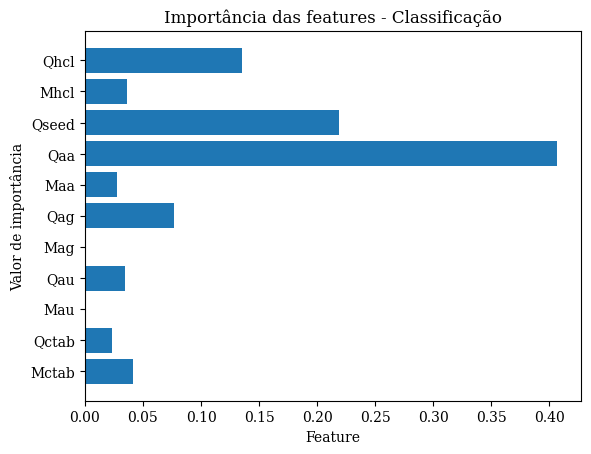

In [9]:
plt.barh(features,feature_importance_c)

plt.xlabel('Feature'),plt.ylabel('Valor de importância'), plt.title('Importância das features - Classificação')

# plt.savefig('figs/importancia_class.png')

plt.show()

### Plot da importância das features - Regressão

In [10]:
abs_1 = list(df['Abs 1º Pico'])
abs_2 = list(df['Abs 2º Pico'])
abs_3 = list(df['Abs 3º Pico'])

In [11]:
for i in range(len(abs_1)):
    if np.isnan(abs_1[i]):
        abs_1[i] = 0

for i in range(len(abs_2)):
    if np.isnan(abs_2[i]):
        abs_2[i] = 0

for i in range(len(abs_3)):
    if np.isnan(abs_3[i]):
        abs_3[i] = 0

In [12]:
df['Abs 1º Pico'] = abs_1
df['Abs 2º Pico'] = abs_2
df['Abs 3º Pico'] = abs_3

In [13]:
X = df.iloc[:,1:12]
y = df.iloc[:,-4:-1]

In [14]:
features = list(X.columns)

In [15]:
model = RandomForestRegressor()

model.fit(X, y)

feature_importance_r = model.feature_importances_

for i, importance in enumerate(feature_importance_r):
    print(f'Feature {i+1}: {importance}')

Feature 1: 0.2088183783993653
Feature 2: 0.010571008583007602
Feature 3: 0.0
Feature 4: 0.01416857775001268
Feature 5: 0.0
Feature 6: 0.06155887256378985
Feature 7: 0.012636330849027978
Feature 8: 0.48429565564728844
Feature 9: 0.15201589989531789
Feature 10: 0.009707898434558519
Feature 11: 0.04622737787763154


In [16]:
# index = np.argsort(feature_importance_r)
# feature_importance_r = np.array(feature_importance_r)[index]
# features = np.array(features)[index]

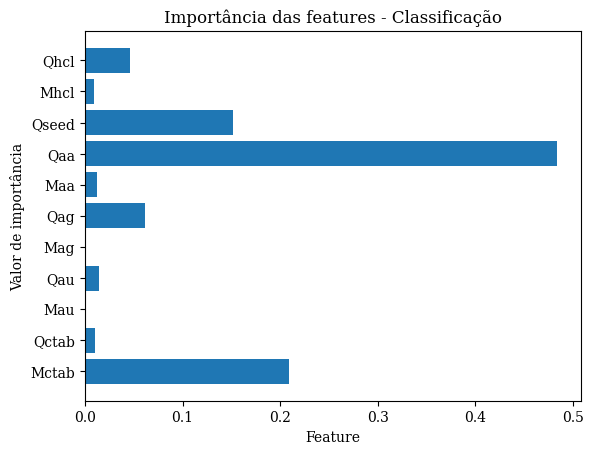

In [17]:
plt.barh(features,feature_importance_r)

plt.xlabel('Feature'),plt.ylabel('Valor de importância'), plt.title('Importância das features - Classificação')

plt.show()

### Junção importâncias

In [18]:
bar = 0.35
pos_r = np.arange(len(features))
pos_c = pos_r + bar

In [19]:
join = feature_importance_r + feature_importance_c

In [20]:
index = np.argsort(join)

feature_importance_c = np.array(feature_importance_c)[index]
feature_importance_r = np.array(feature_importance_r)[index]

features = np.array(features)[index]

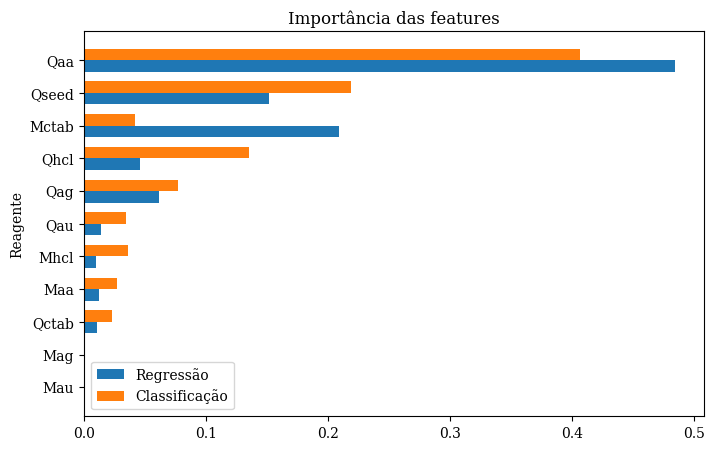

In [32]:
plt.figure(figsize=(8, 5))
plt.barh(pos_r, feature_importance_r, bar, label='Regressão')
plt.barh(pos_c, feature_importance_c, bar, label='Classificação')
# plt.xlabel('Features')
plt.ylabel('Reagente')
plt.title('Importância das features')
plt.yticks(pos_r + bar/2, features)
plt.legend()
plt.savefig('figs/importancia.png')
plt.show()

### Matriz de correlação de classificação

In [22]:
res = list(df['Resultado'])

In [23]:
res_2 = []

for i in range(len(res)):
    if res[i] == 'NF' or res[i] == 'FI':
        res_2.append(False)
    else:
        res_2.append(True)

In [24]:
df_novo = df.iloc[:,1:12]

In [25]:
df_novo['Resultado'] = res_2

In [26]:
df_novo.corr().iloc[:-1,-1]

Mctab   -0.245530
Qctab   -0.309016
Mau           NaN
Qau     -0.309016
Mag           NaN
Qag      0.233734
Maa     -0.309016
Qaa      0.327152
Qseed    0.612487
Mhcl    -0.115163
Qhcl    -0.083154
Name: Resultado, dtype: float64